__<font size = 7 ><span style="color: orange;"> Predicting Formula Stability: A Data-Driven Approach </span></font>__

__Author:__ Anderson Claret


This project was inspired by the article "Machine learning approach to packaging compatibility testing in the new product development process", published in the Journal of Intelligent Manufacturing (https://doi.org/10.1007/s10845-023-02090-8). This article highlighted the potential of machine learning (ML) to revolutionize packaging compatibility testing by reducing time and cost while improving accuracy.

__References:__
Piotrowski, N., 2023. Machine learning approach to packaging compatibility testing in the new product development process. Journal of Intelligent Manufacturing, pp.1-13.

__<font size = 6 ><span style="color: orange;"> Summary </span></font>__

Cosmetic formula stability studies pose unique challenges due to the diverse and complex nature of cosmetic ingredients. Factors such as interactions between ingredients, exposure to light, and temperature variations can impact the stability of formulations. Traditional methods often struggle to capture these intricate relationships, making it challenging to __predict and prevent stability issues effectively__.

## Challenges of Cosmetic Formula Stability Studies:

- Complex data: Stability data involves multiple features (ingredients, pH, temperature, etc.) interacting in non-linear ways, making traditional analysis difficult.
- Limited data: Generating stability data through real-time testing is expensive and time-consuming, leading to small datasets.
- Subjectivity in Pass/Fail criteria: Defining "stability" can be subjective, with manufacturers and regulatory bodies having different thresholds.
- Cost and time: Traditional testing methods are costly and slow down product development.

## Innovation through Machine Learning (ML):

To overcome these limitations and constraints, this project proposes a data-driven approach utilizing ML to predict formula stability. ML algorithms offer several advantages, including the ability to:

- Unravel complex relationships: ML algorithms can identify hidden patterns and interactions in stability data, leading to better understanding of formula behavior.
- Data augmentation: ML can generate synthetic data, addressing the scarcity issue and improving model generalizability.
- Predictive models: ML models can predict stability based on readily available features, eliminating the need for extensive testing.
- Faster development: ML can accelerate product development by predicting stability early in the formulation process.
- Performance: ML models can omprove their performance with every new data point, making them ideal for situations with limited data availability.

The models proposed in this project employs a classification approach, a subset of Supervised ML.

**As this is an educational project, and no publically available dataset was found, we will <font size = 3.5><span style="color: orange;"> <ins> simulate</ins> </span></font> the data.**

At a high level, a ML model is a computational algorithm or system that learns patterns from data and makes predictions or decisions without being explicitly programmed for the specific task. On summary, this is how it works:

__Learning from Data:__

- Training Data: ML models start with a collection of examples (data) that showcase the problem they need to solve. This data contains inputs (features) and desired outputs (labels).
- Learning Algorithm: The model uses a specific algorithm to analyze this data, searching for patterns and relationships between the inputs and outputs.
- Model Development: Through this process, the model builds a mathematical representation of these patterns, essentially capturing the "rules" that link inputs to outputs.

__Making Predictions:__

- New Data: Once trained, the model can encounter new, unseen data.
- Applying Rules: It uses the learned patterns to make predictions about the outputs for these new inputs.
- Output Generation: The model generates predictions that mirror those found in the training data, aiming for accuracy and generalization to real-world examples.

<center>
<img src="https://commandstech.com/wp-content/uploads/2018/11/MLWF.png" width="800" /> <figcaption> Source of Image: https://commandstech.com/ml/</figcaption>
</center>
<br>
<br>

The project was made using the Python programming language. The primary objective is to enable readers to <font size = 3 ><span style="color: orange;"> understand the functionalities of this tool without the expectation that they possess programming expertise. </span></font> Rather than comprehending the intricacies of the code, the aim is for readers to grasp the results at each step of the machine learning process. I have made an effort to elucidate each line of code to the best of my ability. If there are any questions, please feel free to reach out for clarification, keeping in mind that it is not assumed that the reader has knowledge of programming code composition.

__<font size = 6 ><span style="color: orange;"> 1. Importing Libraries: </span></font>__

Among the standout attributes of Python is its robust library ecosystem. A Python library is essentially a script developed by someone, capable of executing a predefined set of tasks. Utilizing a Python library is as straightforward as employing the "import" command.

PS: The __<font size = 3 ><span style="color: orange;">#</span></font>__ in python is for commenting the code. I will try to comment each important line of code, explaining what it does.

In [1]:
# Libraries for data manipulation and analysis:
import pandas as pd  # For working with data in tabular format (DataFrames).
import numpy as np  # For numerical computations and array operations.

# Libraries for data visualization:
import matplotlib.pyplot as plt # pyplot library for creating various plots.
import seaborn as sns # seaborn library is used for advanced statistical data visualization.
from pandas.io.formats.style import Styler  # Helps style a DataFrame or Series according to the data.

# Libraries for machine learning:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets.
from sklearn.preprocessing import StandardScaler  # For scaling features to a standard range.

# Libraries for machine learning models for classification:
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors model.
from sklearn.svm import SVC  # Support Vector Machine model.
from sklearn.ensemble import RandomForestClassifier  # Random Forest model.

# Libraries for metrics for evaluating model performance:
from sklearn.metrics import accuracy_score, precision_score, recall_score  # To measure model accuracy, precision, and recall.

# Libraries for building deep learning models:
from tensorflow.keras.models import Sequential  # For creating a sequential model (stacking layers).
from tensorflow.keras.layers import Dense  # For adding fully connected layers to the model.

C:\Users\casar\anaconda3\envs\env-tf-gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


__<font size = 6 ><span style="color: orange;">2. Creating Simulated Data:</span></font>__

Due to the lack of publicly available datasets, project data was meticulously simulated, trying to capture the complexities of real-world cosmetic formula stability. Because of that, some important steps of Data Preprocessing, such as cleaning the data, addressing missing values and outliers, will not be performed, as it will not be necessary.

Each feature contributes with unique information about factors that can affect cosmetic formula stability. The ML model will learn to identify patterns within these features that distinguish between stable and unstable formulas, enabling prediction of stability for new formulas based on their characteristics.

These are the __Features__:

- Viscosity: Affects the formula's resistance to change, degradation, and microbial growth.
- pH: Influences ingredient stability, microbial growth, and product feel.
- Preservative Concentration (%): Determines effectiveness against microbial contamination.
- Active Ingredient Type: Water-soluble, oil-soluble, or amphiphilic ingredients have varying stability profiles.
- Emulsifier Type: Ionic, nonionic, or zwitterionic emulsifiers can impact stability and compatibility.
- Storage Temperature (°C): Higher temperatures can accelerate degradation reactions.
- Presence of Antioxidants: Antioxidants protect against oxidation, a common cause of instability.
- Packaging Material: Glass, plastic, and aluminum offer different levels of protection against light and oxygen.
- Manufacturing Method: Hot, cold, or microencapsulation processes can influence ingredient interactions and stability.

__Feature engineering__: Creating new features from the available data can aid in capturing important relationships between existing features. Domain expertise is indispensable for effective feature engineering. It guides the creation of features that align with the problem's nature, enabling machine learning models to capture meaningful patterns and deliver reliable insights.

- Viscosity_squared: Captures non-linear effects of viscosity on stability. Might highlight formulas with exceptionally high or low viscosity that behave differently than those in the middle range.
- pH_log: Considers the logarithmic nature of pH, where small changes can have significant impacts. Allows the model to better understand the influence of pH on stability.
- Temp_preservative_interaction: Represents the combined effect of preservative concentration and storage temperature. Models how these factors might interact to affect stability, potentially revealing that higher temperatures require higher preservative concentrations for effectiveness.

<font size = 3 ><span style="color: black;"> __Please note that the selection of features for this study might not make practical sense in the real world. They were based on  available data on the internet and may not capture the full complexity of formulation considerations within the cosmetics industry. They were selected and artificially generated for maximum class separability, for educational purposes only.__ </span></font>

## 2.1. Creating the Features:

In [2]:
# Define number of samples and features.
n_samples = 1000 # This is the number of samples we will utilize to train and test the ML models.

# These are the numerical/categoricall features that will describe the product tested.
# We will use a pandas dataframe (pd.DataFrame) to store our simulated data. Each line below creates a feature.
# We will call our dataframe simply "df".
df = pd.DataFrame({
    # Generating random uniform values between 3000 and 10000 for Viscosity.
    'Viscosity': np.random.uniform(3000, 10000, size=n_samples),
    # Generating random uniform values between 4 and 8 for pH.
    'pH': np.random.uniform(4, 8, size=n_samples),
    # Generating random uniform values between 0.1 and 1.0 for Preservative Concentration (%).
    'Preservative Concentration (%)': np.random.uniform(0.1, 1.0, size=n_samples),
    # Randomly choosing from the given options for Active Ingredient Type.
    'Active Ingredient Type': np.random.choice(['Water-soluble', 'Oil-soluble', 'Amphiphilic'], size=n_samples, replace=True),
    # Randomly choosing from the given options for Emulsifier Type
    'Emulsifier Type': np.random.choice(['Ionic', 'Nonionic', 'Zwitterionic'], size=n_samples, replace=True),
    # Generating random uniform values between 20 and 40 for Storage Temperature (°C).
    'Storage Temperature (°C)': np.random.uniform(20, 40, size=n_samples),
    # Randomly choosing from the given options for Presence of Antioxidants.
    'Presence of Antioxidants': np.random.choice(['No', 'Yes', 'Limited'], size=n_samples, replace=True),
    # Randomly choosing from the given options for Packaging Material.
    'Packaging Material': np.random.choice(['Glass', 'Plastic', 'Aluminum'], size=n_samples, replace=True),
    # Randomly choosing from the given options for Manufacturing Method.
    'Manufacturing Method': np.random.choice(['Hot process', 'Cold process', 'Microencapsulation'], size=n_samples, replace=True),
})

# Feature engineering - Creating new features from the available data.
df['Viscosity_squared'] = df['Viscosity']**2
df['pH_log'] = np.log10(df['pH'])
df['Temp_preservative_interaction'] = df['Preservative Concentration (%)'] * df['Storage Temperature (°C)']

del(n_samples) # We will delete this variable, as it will not be used anymore.

## 2.2. Creating the Labels:

In a ML problem, labels refer to the outcomes or categories that the model is trained to predict. They are the target variable or the answer we want the ML algorithm to learn and predict based on input features. In this case, the labels will be "Pass" or "Fail" for the study outcome. The ML model will learn patterns from labeled examples during training and uses that knowledge to make predictions on new, unseen data.

In [3]:
# Generating labels "Pass". Initially all the labels will be "Pass".
df['Stability_Label'] = 'Pass'

We will use pre-defined rules for failing conditions. Again, these are simulated situations:

In [4]:
# Assign 'Fail' label to rows where pH is less than 5 or Preservative Concentration is less than 0.3
df.loc[(df['pH'] < 5) | (df['Preservative Concentration (%)'] < 0.3), 'Stability_Label'] = 'Fail'
# Assign 'Fail' label to rows where Storage Temperature is greater than 35 and Packaging Material is 'Plastic'
df.loc[(df['Storage Temperature (°C)'] > 35) & (df['Packaging Material'] == 'Plastic'), 'Stability_Label'] = 'Fail'
# Assign 'Fail' label to rows where Active Ingredient Type is 'Oil-soluble' and Emulsifier Type is 'Ionic'
df.loc[(df['Active Ingredient Type'] == 'Oil-soluble') & (df['Emulsifier Type'] == 'Ionic'), 'Stability_Label'] = 'Fail'

__<font size = 6 ><span style="color: orange;">3. Exploratory Data Analysis (EDA) and Data Visualization</span></font>__

EDA lays the foundation for understanding your data, its characteristics, and its potential underlying patterns. It helps guide feature selection, model building, and interpretation of results.

<font size = 3 ><span style="color: black;"> __Given that the data in this project is artificially generated, the insights derived will be notably constrained. However,  for educational purposes, we will still delve into the discussion of some important tools.__</span></font> 

## 3.1. Understand Data Structure:

### 3.1.1. Printing sample rows: 

Gives you a quick glimpse of the data format, variable types, and potential patterns.


In [5]:
df.head(10) # df.head(n) shows the firs n elements in our dataframe.

,Viscosity,pH,Preservative Concentration (%),Active Ingredient Type,Emulsifier Type,Storage Temperature (°C),Presence of Antioxidants,Packaging Material,Manufacturing Method,Viscosity_squared,pH_log,Temp_preservative_interaction,Stability_Label
0,5712.363995,5.059525,0.732373,Amphiphilic,Zwitterionic,34.849505,Limited,Plastic,Cold process,3.263110e+07,0.704110,25.522832,Pass
1,9607.052852,5.980355,0.529813,Oil-soluble,Nonionic,24.015728,Yes,Glass,Hot process,9.229546e+07,0.776727,12.723854,Pass
2,4733.546242,5.810748,0.124164,Water-soluble,Zwitterionic,33.469836,Limited,Aluminum,Cold process,2.240646e+07,0.764232,4.155757,Fail
3,4764.119465,7.238762,0.239738,Water-soluble,Nonionic,29.410383,Limited,Glass,Cold process,2.269683e+07,0.859664,7.050781,Fail
4,5195.097212,4.648070,0.748535,Water-soluble,Ionic,27.536258,No,Glass,Microencapsulation,2.698904e+07,0.667273,20.611863,Fail
5,9466.076472,6.119003,0.465870,Water-soluble,Zwitterionic,30.562020,Yes,Aluminum,Microencapsulation,8.960660e+07,0.786681,14.237917,Pass
6,4546.867362,4.682495,0.397658,Water-soluble,Zwitterionic,24.342925,Limited,Plastic,Cold process,2.067400e+07,0.670477,9.680167,Fail
7,5903.135851,5.608198,0.552999,Amphiphilic,Ionic,24.374302,Limited,Plastic,Microencapsulation,3.484701e+07,0.748823,13.478964,Pass
8,8197.063419,7.445056,0.979693,Water-soluble,Zwitterionic,21.194211,No,Aluminum,Cold process,6.719185e+07,0.871868,20.763830,Pass
9,6609.131812,4.430221,0.289657,Water-soluble,Ionic,30.241134,Yes,Plastic,Hot process,4.368062e+07,0.646425,8.759563,Fail


### 3.1.2. Checking data types: 

Ensures you're using appropriate analysis methods for each variable type (numerical vs. categorical).

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Viscosity                       1000 non-null   float64
 1   pH                              1000 non-null   float64
 2   Preservative Concentration (%)  1000 non-null   float64
 3   Active Ingredient Type          1000 non-null   object 
 4   Emulsifier Type                 1000 non-null   object 
 5   Storage Temperature (°C)        1000 non-null   float64
 6   Presence of Antioxidants        1000 non-null   object 
 7   Packaging Material              1000 non-null   object 
 8   Manufacturing Method            1000 non-null   object 
 9   Viscosity_squared               1000 non-null   float64
 10  pH_log                          1000 non-null   float64
 11  Temp_preservative_interaction   1000 non-null   float64
 12  Stability_Label                 100

## 3.2. Explore Descriptive Statistics:

- Numerical features: Quantifies central tendency (mean, median), spread (standard deviation), and potential skewness.
- Categorical features: Provides insight into the distribution of categories and their relationship with stability.

In [7]:
df.describe() # Numerical features.

,Viscosity,pH,Preservative Concentration (%),Storage Temperature (°C),Viscosity_squared,pH_log,Temp_preservative_interaction
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,6510.559125,6.014092,0.563256,29.880408,4.666951e+07,0.771194,16.806366
std,2070.365034,1.133290,0.261881,5.854462,2.720296e+07,0.084085,8.564041
min,3002.849104,4.000994,0.100160,20.016427,9.017103e+06,0.602168,2.420341
25%,4682.351154,4.994049,0.329756,24.875841,2.192441e+07,0.698453,9.553592
50%,6593.198055,6.001340,0.572959,29.763473,4.347027e+07,0.778248,16.363206
75%,8291.218617,7.030277,0.793519,35.059318,6.874431e+07,0.846972,23.121498
max,9984.133454,7.997975,0.996032,39.983128,9.968292e+07,0.902980,38.105906


In [8]:
df.describe(include='object') # Categorical features.

,Active Ingredient Type,Emulsifier Type,Presence of Antioxidants,Packaging Material,Manufacturing Method,Stability_Label
count,1000,1000,1000,1000,1000,1000
unique,3,3,3,3,3,2
top,Water-soluble,Nonionic,No,Glass,Cold process,Fail
freq,342,346,344,345,350,528


## 3.3. Visualize Distributions:

- Histograms: Reveals the shape and spread of each numerical variable's distribution. Helps identify potential outliers or multimodal distributions.
- Box plots: Shows differences in central tendency and dispersion between stable and unstable groups for each variable.

C:\Users\casar\anaconda3\envs\env-tf-gpu\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


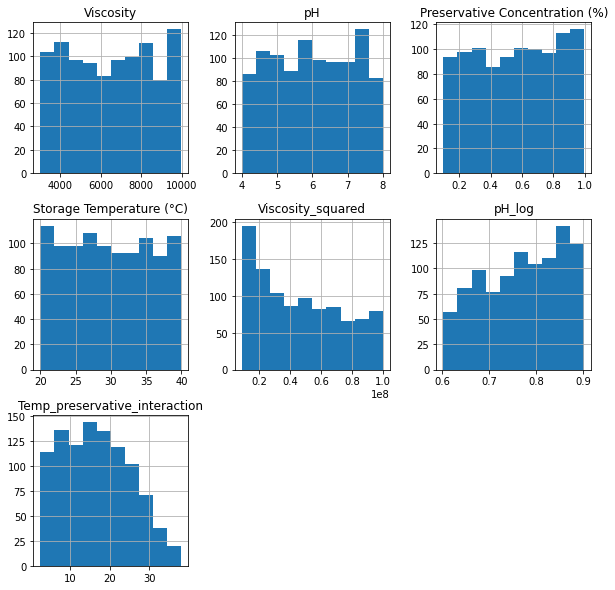

In [9]:
# Histograms
df.hist(figsize=(10, 10)) # Creating the histogram with a figure size of 10 x 10 inches.
plt.show()

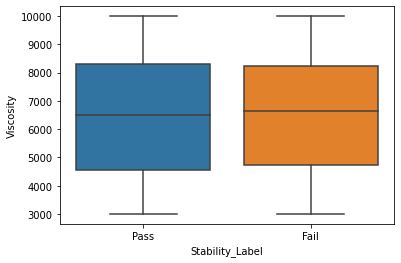

In [10]:
# Boxplots - Exmaple: Viscosity:
sns.boxplot(x='Stability_Label', y='Viscosity', data=df)
plt.show()

## 3.4. Investigate Relationships:

### 3.4.1. Correlation matrix:

The correlation matrix is a square table that summarizes the strength and direction of linear relationships between pairs of numerical variables in a dataset. Calculated using the df.corr() method in pandas.

Each cell displays a correlation coefficient, typically Pearson's correlation coefficient (r), ranging from -1 to 1:
- -1 indicates a perfect negative correlation: As one variable increases, the other decreases.
- 0 indicates no linear correlation: The variables are independent.
- 1 indicates a perfect positive correlation: Both variables increase or decrease together.

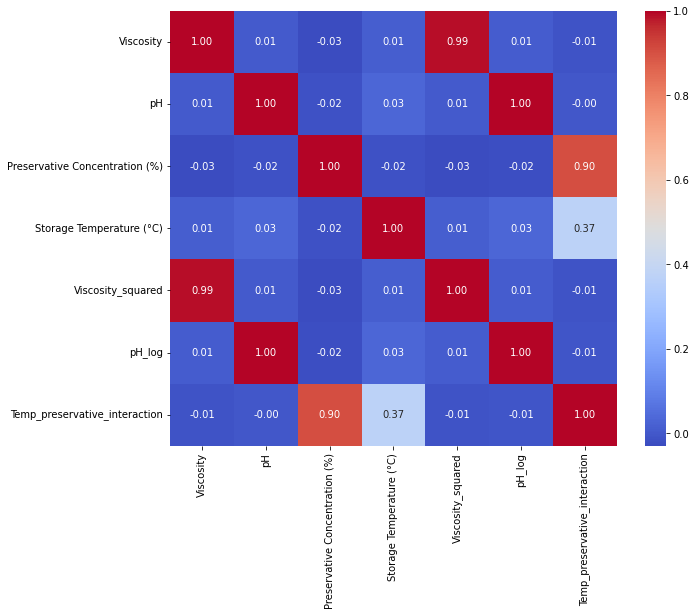

In [11]:
plt.figure(figsize=(10, 8))  # Set figure size to 10 inches wide and 8 inches tall.

# Generating a heatmap:
sns.heatmap(
    df.corr(),  # Calculate and display the correlation matrix of the dataFrame.
    annot=True,  # Display numerical correlation values within each cell.
    cmap='coolwarm',  # Use a color palette ranging from blue (negative correlation) to red (positive correlation).
    fmt='.2f',  # Formats correlation values to two decimal places.
)

# Display the generated heatmap.
plt.show()

__Limitations:__

- Linearity: Only captures linear relationships. It might miss non-linear associations (e.g., quadratic, exponential, or periodic).
- Correlation vs. Causation: A high correlation doesn't imply causation. It might reflect external factors or coincidence.
- Outliers: Sensitive to outliers, which can distort correlations.
- Multicollinearity: Cannot distinguish between direct and indirect correlations in complex relationships.
- Non-numerical Variables: Doesn't directly work with categorical variables.


__Best Practices:__

- Visualize data with scatter plots to confirm linear relationships before relying on correlation matrices.
- Consider non-linear correlation measures for non-linear relationships.
- Use domain knowledge to guide interpretation and avoid causal assumptions based solely on correlations.
- Handle outliers appropriately to ensure reliable results.
- Employ techniques like principal component analysis (PCA) to address multicollinearity.
- Use appropriate methods for categorical variables, such as correlation ratios or chi-square tests.

### 3.4.2. Scatter plots: 

Allows closer inspection of specific relationships between individual features and stability, potentially revealing non-linear patterns.

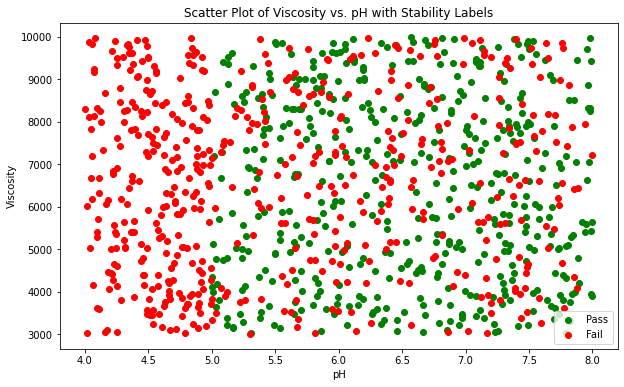

In [12]:
# Create a scatter plot with different colors for "Pass" and "Fail" labels
plt.figure(figsize=(10, 6))

# Scatter plot for "Pass" labels
plt.scatter(df.loc[df['Stability_Label'] == 'Pass', 'pH'], df.loc[df['Stability_Label'] == 'Pass', 'Viscosity'], color='green', label='Pass')

# Scatter plot for "Fail" labels
plt.scatter(df.loc[df['Stability_Label'] == 'Fail', 'pH'], df.loc[df['Stability_Label'] == 'Fail', 'Viscosity'], color='red', label='Fail')

# Set labels and title
plt.xlabel('pH')
plt.ylabel('Viscosity')
plt.title('Scatter Plot of Viscosity vs. pH with Stability Labels')
plt.legend()  # Show legend

# Show the plot
plt.show()

## 3.5. Analyze Categorical Features:

### 3.5.1. Value counts: 

Understands the frequency of each category and identifies potential imbalances.

In [13]:
print(df['Packaging Material'].value_counts()) # The value.counts() displays the frequency of each unique value in the specified column.

Glass       345
Plastic     335
Aluminum    320
Name: Packaging Material, dtype: int64


### 3.5.2. Bar plots: 

Visually compare the distribution of categorical features across stable and unstable groups, highlighting relevant associations.

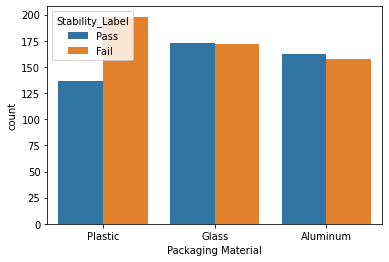

In [14]:
sns.countplot(x='Packaging Material', hue='Stability_Label', data=df)
plt.show()

## 3.6. Visualize Class Distribution:

- Pie chart: Provides a quick overview of the proportion of different classes in the dataset.

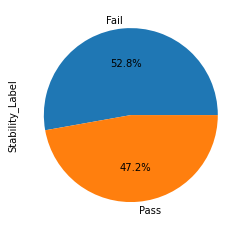

In [15]:
df['Stability_Label'].value_counts().plot.pie(autopct="%1.1f%%") # Creating a pie chart directly from the value counts, and adding percentages within each pie slice.
plt.show()

__<font size = 6 ><span style="color: orange;">4. Categorical Encoding, Data Splitting and Feature Scaling</span></font>__

The Categorical Encoding, Data Splitting and Feature Scaling are preprocessing steps for modeling the data to the feed the ML models.

## 4.1. Categorical Encoding:

- Converts categorical variables (e.g., "Packaging Material") into numerical representations for use in the ML models.
- Techniques include:
  - One-hot encoding
  - Label encoding
  - Ordinal encoding
  
We will use the __get_dummies__ function to perform __One-hot encoding__ on multiple categorical columns. One-hot encoding basically creates new binary (0 or 1) columns, where each new column represents one of the original categories.

This technique is appropriate here because:
- No inherent order: The categorical features don't have a natural ranking or hierarchy, making one-hot encoding suitable to avoid introducing unintended assumptions.
- Multiple categories: Some features have multiple possible values (e.g., "Active Ingredient Type"), and one-hot encoding effectively captures these distinctions.

Then, we will drop irrelevant columns to keep the dataframe focused and reduce potential noise.

In [16]:
# Encode the target variable (stability label) as numerical:
df['Stability_Label_Num'] = df['Stability_Label'].map({'Pass': 1, 'Fail': 0})

# Apply one-hot encoding to categorical features:
df_encoded = pd.get_dummies(df, columns=['Active Ingredient Type',
                                          'Emulsifier Type',
                                          'Presence of Antioxidants',
                                          'Packaging Material',
                                          'Manufacturing Method']) \
                .drop(columns=['Viscosity', 'pH', 'Preservative Concentration (%)',
                               'Storage Temperature (°C)', 'Viscosity_squared',
                               'pH_log', 'Temp_preservative_interaction',
                               'Stability_Label', 'Stability_Label_Num']) \
                .astype('int64')  # Ensure integer dtype for one-hot encoded columns

# Remove original categorical columns from the main DataFrame:
df = df.drop(columns=['Active Ingredient Type', 'Emulsifier Type',
                      'Presence of Antioxidants', 'Packaging Material',
                      'Manufacturing Method'])

# Concatenate the encoded columns back to the main DataFrame:
df = pd.concat([df, df_encoded], axis=1)

## 4.2. Data Splitting:

The data splitting process is a crucial step in ML, and it involves dividing a dataset into different subsets for training and testing purposes. 

__Training Set:__

- The training set is a portion of the dataset used to train the ML model. The model learns patterns, relationships, and features from this set. The larger the training set, the better the model can potentially learn the underlying patterns in the data.

__Testing Set:__

- The testing set is a separate portion of the dataset that is not used during the training phase. It serves as an independent evaluation to assess how well the model generalizes to new, unseen data. The goal is to evaluate the model's performance on data it has not encountered before.

Randomization: It's essential to randomly shuffle the dataset before splitting to ensure that the distribution of classes or patterns is consistent across the training and testing sets. This helps prevent the model from learning patterns specific to the order of the data.

Splitting Ratio: The ratio between the training and testing sets is a critical consideration. Common ratios include 70-30, 80-20, or 90-10, depending on the size of the dataset and the specific requirements of the problem.

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Stability_Label', 'Stability_Label_Num'], axis=1), df['Stability_Label_Num'], test_size=0.2)

## 4.3. Feature Scaling:

Many ML algorithms are sensitive to the scale of the input features. Features with larger scales may have a disproportionate impact on the model, potentially overshadowing features with smaller scales. Feature scaling helps mitigate this issue.

Feature scaling is a preprocessing technique in ML that involves transforming the numerical features of a dataset to a similar scale. The goal is to ensure that all features contribute equally to the model's performance and prevent certain features from dominating due to differences in their original scales.

Feature scaling is typically applied after splitting the data into training and testing sets to avoid __data leakage__. It involves fitting the scaler (based on training data) and transforming both training and testing sets. Data leakage is a common issue in ML where information from the test set or unseen data unintentionally influences the training process, leading to overly optimistic model evaluations and poor generalization to new data. It can severely impact the reliability and effectiveness of machine learning models. 

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data

# List of numerical features to scale
numerical_features = ['Viscosity','pH', 'Preservative Concentration (%)','Storage Temperature (°C)', 'Viscosity_squared', 'pH_log', 'Temp_preservative_interaction']

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_train[numerical_features] = X_train_scaled

X_test_scaled = scaler.transform(X_test[numerical_features])
X_test[numerical_features] = X_test_scaled

While numerical features are commonly scaled, categorical features might not require scaling in the same way. However, in certain situations, techniques like one-hot encoding can be applied to represent categorical variables as binary values, and the resulting features can be scaled if needed.

__<font size = 6 ><span style="color: orange;">5. Machine Learning Models:</span></font>__

We will use 4 different ML models to perform the task of classifying the formulas in "Pass" or "Fail" based on the formulas features.
- __K-Nearest Neighbors (KNN)__
- __Support Vector Machine (SVM)__
- __Random Forest (RF)__
- __Artificial Neural Network (ANN)__

These models were chosen for their large applicability. Each model has its strengths and weaknesses, and the best choice depends on your specific data and goals. KNN and SVM are simpler to interpret, while Random Forest and ANN are more powerful but less transparent.

For all models, we will calculate the following evaluation metrics:

__Accuracy:__

- Measures: The overall proportion of correct predictions made by the model.
- Think of it as: The percentage of times the model got things right.
- Formula: (True Positives + True Negatives) / Total Predictions

__Precision:__

- Measures: The model's ability to avoid false positives (predicting a positive when it's actually negative).
- Think of it as: The accuracy of positive predictions.
- Formula: True Positives / (True Positives + False Positives)

__Recall:__

- Measures: The model's ability to identify all true positives (predicting a positive when it's actually positive).
- Think of it as: The sensitivity to correctly identifying positives.
- Formula: True Positives / (True Positives + False Negatives)

Key Points: Often, you'll consider these metrics together to make informed decisions about model performance. For example, high precision but low recall might indicate the model is too cautious in predicting positives, while high recall but low precision might mean it's predicting too many positives, even when some are wrong.

## 5.1. K-Nearest Neighbors (KNN):

KNN is a simple and intuitive algorithm. Given a new data point, it looks at the 'k' nearest data points in the training set and classifies the new point based on the majority class among its neighbors. 

Example:
<center>
<img src="https://www.kdnuggets.com/wp-content/uploads/arya_knearest_neighbors_classification_3.jpg" width="500" /> <figcaption> Source of Image: https://www.kdnuggets.com/2022/04/nearest-neighbors-classification.html</figcaption>
</center>
<br>
<br>
The KNN algorithm stands out as one of the most straightforward classification algorithms. Despite its simplicity, it is capable of delivering good results.  

Here, we will define k=5 and train the model. The choice of 'k' (number of neighbors) and the distance metric used are critical parameters that impact the model's performance. The final test accuracy on the unseen data shows the model's real-world performance.

In [19]:
# KNN
# Define KNN with K=5 (5 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN on the training data
knn.fit(X_train, y_train)

# Predict compatibility for the test data
predictions_knn_test = knn.predict(X_test)

# Calculate evaluation  metrics for KNN (accuracy, precision, recall)
knn_accuracy = accuracy_score(y_test, predictions_knn_test)
knn_precision = precision_score(y_test, predictions_knn_test, average="micro")
knn_recall = recall_score(y_test, predictions_knn_test, average="micro")

## 5.2. Support Vector Machine (SVM):

SVM aims to find the hyperplane that best separates data points of different classes. It seeks to maximize the margin, which is the distance between the hyperplane and the nearest data points of each class.

SVM is effective in high-dimensional spaces and is particularly powerful when there is a clear margin of separation between classes. It can use different kernel functions to handle non-linear relationships.

Example:

<center>
<img src="https://miro.medium.com/v2/resize:fit:581/1*-4FOSXGyV6CSUOrOPEFc9g.png" width="400" /> <figcaption> Source of Image: https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/ </figcaption> 
</center>
<br>
<br>

We will use a linear kernel and tune the regularization parameter (C) for optimal performance. 

__Kernel:__

- Imagine: It's like a special lens that transforms your data to make it easier for SVM to draw clear decision boundaries.
- Purpose: It projects data into higher-dimensional spaces, allowing SVM to capture complex relationships that might be hidden in the original data.
- Types: Common kernels include linear, polynomial, Gaussian RBF (Radial Basis Function), and sigmoid. Each kernel has its own way of transforming data.
- Choice: The best kernel depends on the nature of your data and problem. Experimentation is often needed to find the most suitable one.

__Regularization Parameter C:__

- Balance: It controls the balance between fitting the training data tightly and generalizing to unseen data.
- Small C: Encourages wider margins around decision boundaries, potentially reducing overfitting (memorizing the training data too much).
- Large C: Prioritizes fitting the training data closely, potentially risking overfitting.
- Tuning: It's crucial to tune C to achieve optimal model performance.

In [20]:
# SVM
# Define SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)

# Train SVM on the training data
svm.fit(X_train, y_train)

# Predict compatibility for the testidation data
predictions_svm_test = svm.predict(X_test)

# Calculate evaluation  metrics for SVM
svm_accuracy = accuracy_score(y_test, predictions_svm_test)
svm_precision = precision_score(y_test, predictions_svm_test, average="micro")
svm_recall = recall_score(y_test, predictions_svm_test, average="micro")

## 5.3. Random Forest (RF):

Random Forest is a very popular ML algorithm that is based on another popular algorithm, called __Decision Trees (DT)__. A RF is an group of DTs. A DT is a popular supervised ML algorithm used for both classification and regression tasks, and it mimics the structure of a tree. The algorithm of the DT constructs its model in the form of a tree, incorporating decision nodes and leaf nodes. Essentially, a DT entails a sequence of consecutive decisions aimed at arriving at a particular outcome.

Example:

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/rfc_vs_dt11.png" width="500" /> <figcaption> Source of Image: https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#What_Are_Decision_Trees? </figcaption> 
</center>
<br>
<br>

The RF algorithm builds multiple decision trees during training and merges them to get a more accurate and stable prediction. Each tree in the forest is trained on a random subset of the data. Imagine a group of movie critics discussing your film, each offering their own review based on experience. Random Forest combines these diverse opinions, taking the majority view as the overall prediction. 

Example:

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" width="500" /><figcaption> Source of Image: https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#What_Are_Decision_Trees? </figcaption> 
</center>
<br>
<br>



In [21]:
# RF
# Define Random Forest with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train Random Forest on the training data
rf.fit(X_train, y_train)

# Predict compatibility for the testidation data
predictions_rf_test = rf.predict(X_test)

# Calculate evaluation  metrics for Random Forest
rf_accuracy = accuracy_score(y_test, predictions_rf_test)
rf_precision = precision_score(y_test, predictions_rf_test, average="micro")
rf_recall = recall_score(y_test, predictions_rf_test, average="micro")

## 5.4. Artificial Neural Network (ANN):

Artificial Neural Networks (ANNs) are a class of ML models inspired by the structure and functioning of the human brain. An ANN is composed of layers of interconnected nodes, known as neurons. These layers are typically divided into three types:
- Input Layer: Neurons that receive the initial features or input data.
- Hidden Layers: Intermediate layers between the input and output layers. Each neuron in a hidden layer processes information from the neurons in the preceding layer.
- Output Layer: Neurons that produce the final output or prediction.

Neurons in one layer are connected to neurons in the next layer through weighted connections. Each connection has an associated weight, representing the strength of the connection. During training, these weights are adjusted to optimize the network's performance.

<center>
<img src="https://www.researchgate.net/publication/352338692/figure/fig12/AS:1037132248403970@1624283005647/General-scheme-of-an-artificial-neural-network-ANN.png" width="400" /><figcaption> Source of Image: Cárdenas, L.L., Mezher, A.M., Bautista, P.A.B., León, J.P.A. and Igartua, M.A., 2021. A multimetric predictive ANN-based routing protocol for vehicular ad hoc networks. IEEE access, 9, pp.86037-86053. </figcaption> 
</center>
<br>
<br>

Each neuron has an activation function that determines its output based on the weighted sum of its inputs. Common activation functions include the sigmoid, hyperbolic tangent (tanh), and rectified linear unit (ReLU).

<center>
<img src="https://www.researchgate.net/publication/341310767/figure/fig7/AS:890211844255749@1589254451431/Common-activation-functions-in-artificial-neural-networks-NNs-that-introduce.ppm" width="500" ><figcaption> Source of Image: https://www.researchgate.net/publication/341310767/figure/fig7/AS:890211844255749@1589254451431/Common-activation-functions-in-artificial-neural-networks-NNs-that-introduce.ppm </figcaption>
</center>
<br>
<br>

Forward Propagation: During the forward propagation phase, input data is fed into the network through the input layer. The information passes through the hidden layers, and the final output is produced by the neurons in the output layer.

Exmaple - Digit Recognition:
<center>
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYjk3YzRiMzNkYzhkYjk3N2M4MGY4M2ZjNzY2ZDRmYTgyZDQzZmM3NyZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/JLAkBDwX5W3tON7sQZ/giphy.gif" width="600" height="600" /><figcaption> Source of Image: https://www.youtube.com/watch?v=Ilg3gGewQ5U </figcaption> 
</center>
<br>
<br>

A loss function measures the difference between the predicted output and the actual target values. The goal during training is to minimize this loss. Backpropagation is the process of adjusting the weights in the network to reduce the loss. It involves computing the gradient of the loss with respect to the weights and updating the weights using optimization algorithms like gradient descent. The network undergoes multiple iterations of forward propagation, loss computation, and backpropagation to learn the patterns and relationships in the training data. This process continues until the model achieves satisfactory performance.

Exmaple - Digit Recognition:
<center>
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNzk5YzQ0MTMwYjA0ZjY2Y2IzNTJiNmMzMWYxMDg3MmI5OGUzZmI3OSZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/P25n246qErDIhfrdtA/giphy.gif" width="600" height="600" /> <figcaption> Source of Image: https://www.youtube.com/watch?v=Ilg3gGewQ5U </figcaption> 
</center>
<br>
<br>

ANNs have various hyperparameters, including the number of layers, the number of neurons in each layer, the choice of activation functions, and the learning rate during training. Tuning these hyperparameters is crucial for achieving optimal performance.

In [22]:
# MLP
# Define a simple ANN with 2 hidden layers
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))

# Compile and train the ANN
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10)

# Predict compatibility for the testidation data
predictions_ann_test = model.predict(X_test).argmax(axis=1)

# Calculate evaluation  metrics for ANN
ann_accuracy = accuracy_score(y_test, predictions_ann_test)
ann_precision = precision_score(y_test, predictions_ann_test, average="micro")
ann_recall = recall_score(y_test, predictions_ann_test, average="micro")

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 1.0119 - accuracy: 0.6575
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7775
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8100
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8338
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8537
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2891 - accuracy: 0.8750
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2588 - accuracy: 0.9000
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9087
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2083 - accuracy: 0.9175
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9312


__<font size = 6 ><span style="color: orange;">6. Results and Conclusion:</span></font>__

Now we can compare the performance of the 4 different ML models based on the established evaluation metrics.

Lets start by creating a dataframe with the results and highlighting the one with the best __Accuracy__.

In [23]:

# Create a DataFrame to organize results
results_df = pd.DataFrame({
    "Model": ["KNN", "SVM", "Random Forest", "ANN"],
    "Accuracy": [knn_accuracy, svm_accuracy, rf_accuracy, ann_accuracy],
    "Precision": [knn_precision, svm_precision, rf_precision, ann_precision],
    "Recall": [knn_recall, svm_recall, rf_recall, ann_recall]
})

# Highlight the best accuracy scores
styled_df = results_df.style.highlight_max(color='green', subset=['Accuracy'])

# Display the formatted DataFrame
display(styled_df) 

,Model,Accuracy,Precision,Recall
0,KNN,0.895000,0.895000,0.895000
1,SVM,0.870000,0.870000,0.870000
2,Random Forest,0.980000,0.980000,0.980000
3,ANN,0.930000,0.930000,0.930000


From the results, we can see that the __RF__ model had the best performance, with an accuracy of 98%, followed by ANN, KNN and SVM.

Keep in mind that no hyperparameters of the models were tunned. __<font size = 3 ><span style="color: orange;"> I highly encourage the reader to go back to the ML models and play with its hyperparameters, to understand its imapcts on the classification results. </span></font>__ 

In this educational project focused on the classification of cosmetic formula stability, we embarked on a journey to leverage data science tools and ML algorithms to enhance our understanding and prediction capabilities in the realm of cosmetic formulation. Through simulated stability data and the application of various classification models, including K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, and Artificial Neural Network (ANN), we gained valuable insights into the performance and nuances of these approaches.

__It is crucial to note that the features used in this study were based on data available on the internet, and while our models performed well, the practical relevance of these features in real-world formulations may require further investigation. Additionally, the simulated nature of the dataset may impact the direct applicability of our findings to actual cosmetic formulations.__

Moving forward, there is an opportunity to refine our models by incorporating domain-specific knowledge from formulators and exploring more extensive and domain-specific datasets. This collaborative approach, combining data-driven insights with expert knowledge, can contribute to the development of more accurate and contextually relevant stability prediction models in the cosmetics industry.

In conclusion, this educational project has unveiled the potential of data science and ML in the formulation stability domain. As we continue to bridge the gap between scientific methodologies and innovative technologies, we are poised to contribute meaningfully to the advancement of cosmetic science, paving the way for more efficient and informed formulation processes.